## Time series forecasting fundamentals with tensorflow

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-03-26 16:20:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.04s   

2024-03-26 16:20:43 (4.67 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## importing time series with pandas

In [2]:
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many sample
len(df)

2787

In [6]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price of Bitcoin')

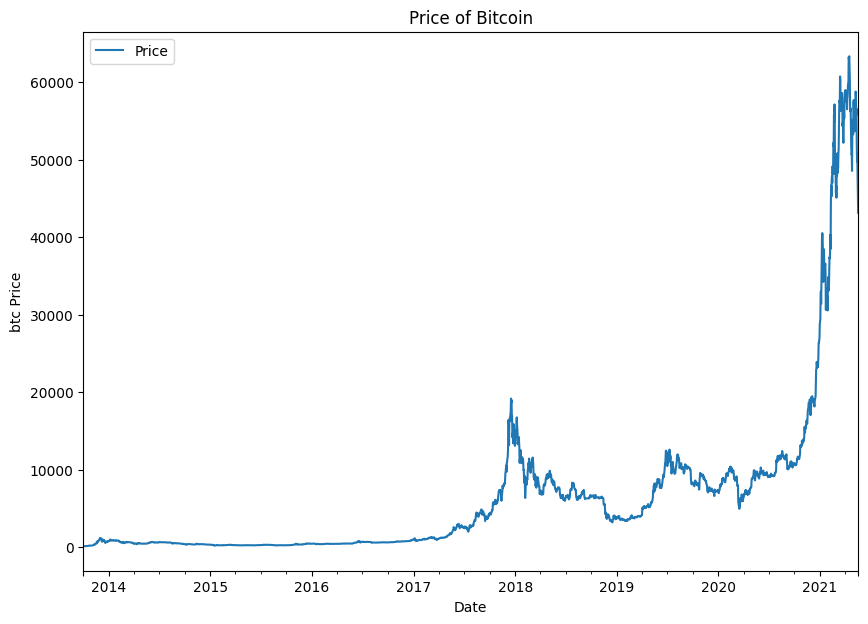

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("btc Price")
plt.title("Price of Bitcoin")

## Importing time series data with python's csv module

In [8]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
      timesteps.append(datetime.strptime(row[1], "%Y-%m-%d"))
      btc_price.append(float(row[2]))

timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

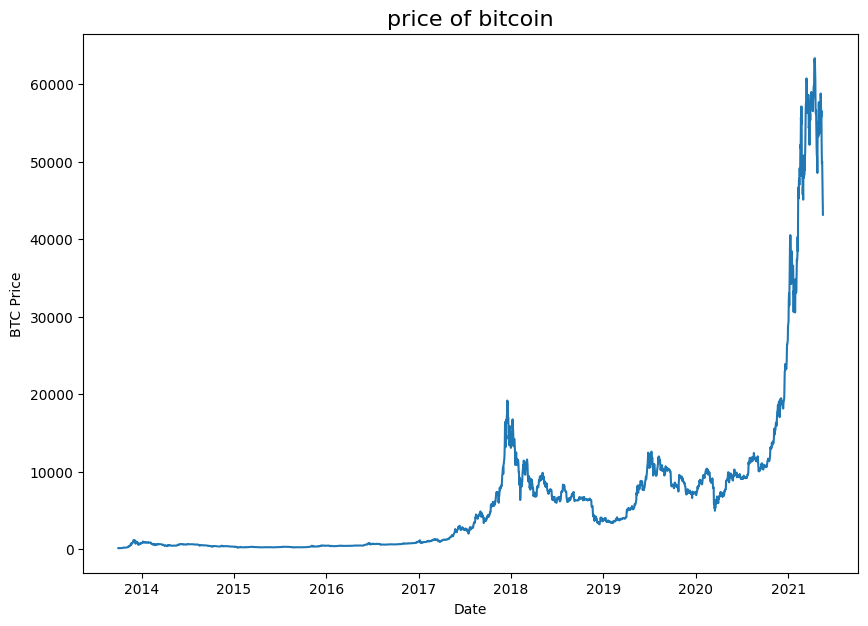

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("price of bitcoin", fontsize=16)
plt.xlabel("Date")

## Format data part 1: Create train and test sets

### the wrong way

In [10]:
from sklearn.model_selection import train_test_split
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

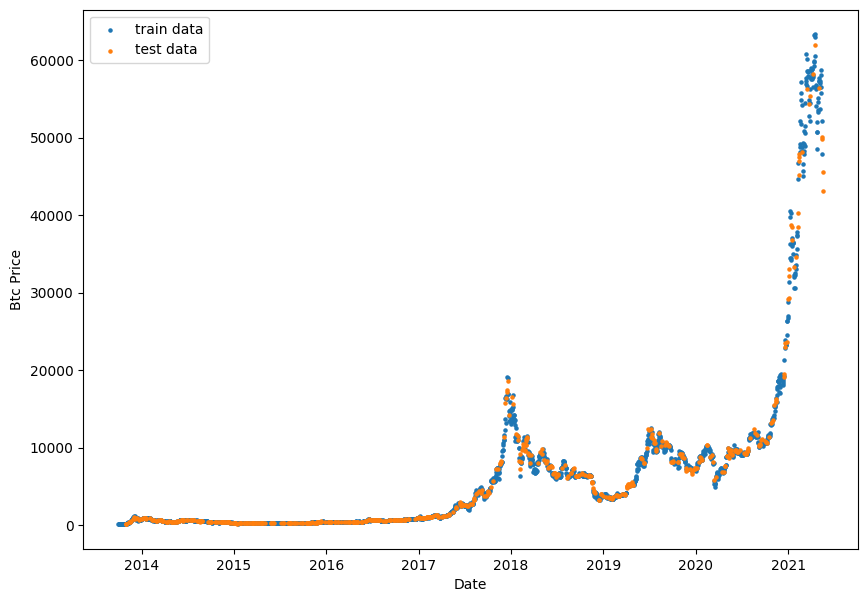

In [12]:
# plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Date")
plt.ylabel("Btc Price")
plt.legend()

### the right way

In [13]:
split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

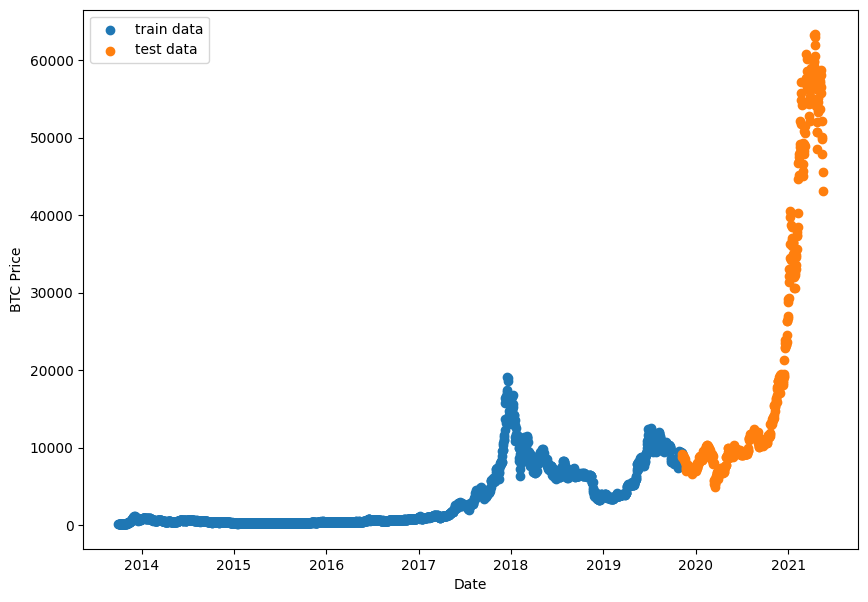

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label="train data")
plt.scatter(X_test, y_test, label="test data")
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.legend()

## Create a plotting function


In [15]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


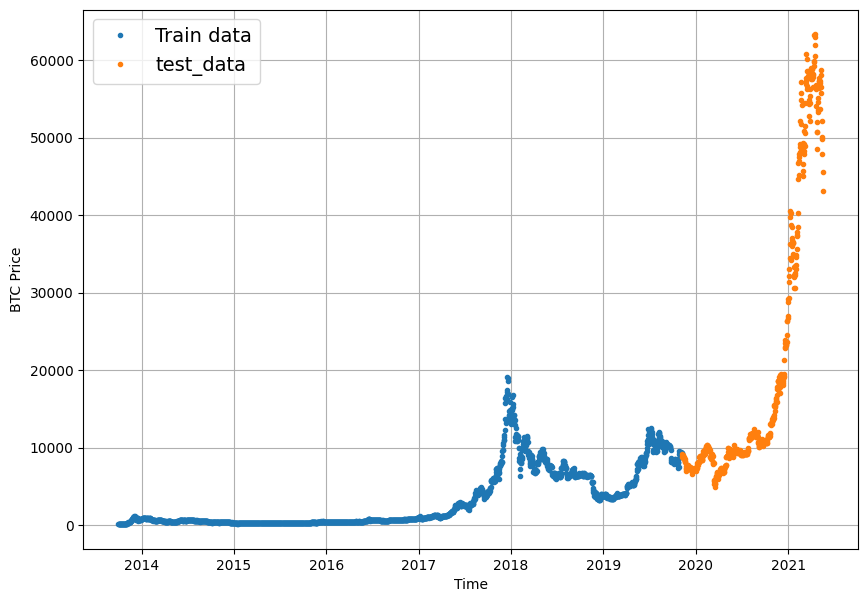

In [16]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="test_data")

## Modelling Experiments

## Model 0: Naive forecast (baseline)

In [17]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

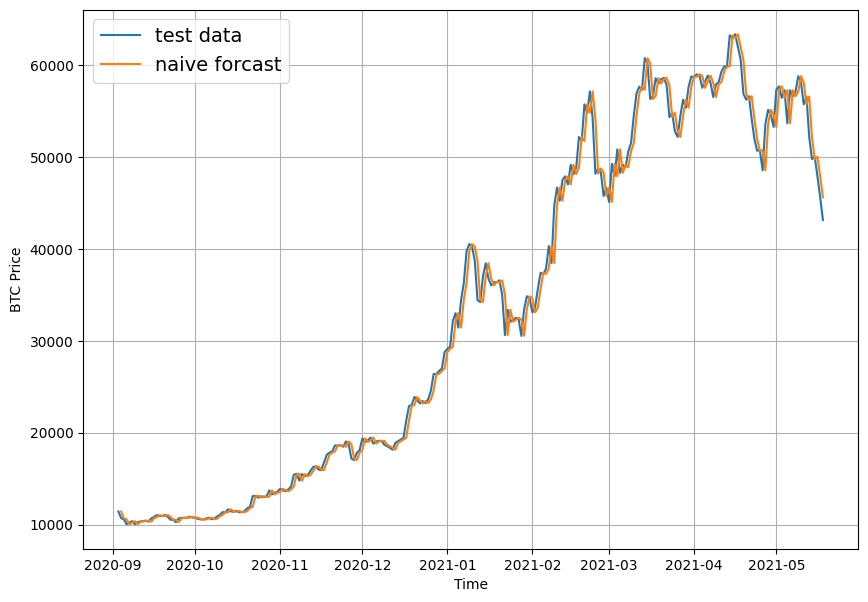

In [18]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="train data")
plot_time_series(timesteps=X_test, values=y_test, start=300, format='-', label="test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast,start=300, format='-', label="naive forcast")

## Evaluating a time series model
* MAE
* MSE
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error


In [19]:
import tensorflow as tf

In [20]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [21]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [22]:
def evaluation_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  metrics = {}
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred).numpy()
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred).numpy()
  mase = mean_absolute_scaled_error(y_true, y_pred).numpy()
  rmse = tf.sqrt(mse).numpy()
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred).numpy()

  metrics["mae"] = mae
  metrics["mse"] = mse
  metrics["mase"] = mase
  metrics["rmse"] = rmse
  metrics["mape"] = mape

  return metrics

In [23]:
naive_results = evaluation_preds(y_test[1:], naive_forecast)

## Format data part2: Windowing our dataset

In [24]:
HORIZON = 1
WINDOW_SIZE = 7


In [25]:
# Create a function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [26]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [27]:
btc_windowed = []
for i in range(len(btc_price)):
  btc_windowed.append([btc_price[i:WINDOW_SIZE+i], btc_price[i+WINDOW_SIZE:i+WINDOW_SIZE+HORIZON]])

In [28]:
import numpy as np
# Create a function to view numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T
  # print(f'window idexes:\n{window_indexes, window_indexes.shape}')

  windowed_array = x[window_indexes]
  # print(windowed_array)
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [29]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [30]:
for i in range(3):
  print(f'window:{full_windows[i]} -> horizon:{full_labels[i]}')

window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> horizon:[123.033]
window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> horizon:[124.049]
window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> horizon:[125.96116]


In [31]:
for i in range(3):
  print(f'window:{full_windows[i-3]} -> horizon:{full_labels[i-3]}')

window:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> horizon:[47885.62525472]
window:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> horizon:[45604.61575361]
window:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> horizon:[43144.47129086]


## Turning windows into training and test sets

In [32]:
def make_train_test_splits(windows, labels, test_split=0.2):
  index = int(len(windows) * (1-test_split))
  X_train, y_train = windows[:index], labels[:index]
  X_test, y_test = windows[index:], labels[index:]
  return X_train, X_test, y_train, y_test


In [33]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [34]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [35]:
test_windows[:5], test_windows[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
      

## Make a modelling checkpoint


In [36]:
import os

# Create a function to implement a modelCheckpoint
def create_model_checkpoint(model_name, save_path="model_experiemnts"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=1,
                                            save_best_only=True)

## Model 1: Dense model (window=7, horizon=1)

In [37]:
tf.random.set_seed(42)
inputs = tf.keras.layers.Input(shape=(7,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(HORIZON)(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', "mse"])

In [39]:
history_model_1 = model_1.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 12s - loss: 3365.3057 - mae: 3365.3057 - mse: 23374024.0000
Epoch 1: val_loss improved from inf to 3001.21460, saving model to model_experiemnts/model_1_dense
18/18 [==============================] - 2s 52ms/step - loss: 1362.9756 - mae: 1362.9756 - mse: 6710963.0000 - val_loss: 3001.2146 - val_mae: 3001.2146 - val_mse: 20114304.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 440.1352 - mae: 440.1352 - mse: 815535.7500
Epoch 2: val_loss improved from 3001.21460 to 1420.65942, saving model to model_experiemnts/model_1_dense
18/18 [==============================] - 1s 34ms/step - loss: 343.2623 - mae: 343.2623 - mse: 472755.8125 - val_loss: 1420.6594 - val_mae: 1420.6594 - val_mse: 5342524.5000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 184.9308 - mae: 184.9308 - mse: 131761.2812
Epoch 3: val_loss improved from 1420.65942 to 1065.71973, saving model to model_experiemnts/model_1_d

In [40]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 576.6528 - mae: 576.6528 - mse: 1174517.5000


[576.65283203125, 576.65283203125, 1174517.5]

In [41]:
# Load in the best performing model_1
model_1 = tf.keras.models.load_model("model_experiemnts/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 565.0366 - mae: 565.0366 - mse: 1156697.6250


[565.0365600585938, 565.0365600585938, 1156697.625]

## Making forecasts with a model (on the test dataset)

In [42]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [43]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8860.451, 8790.321, 9019.151, 8774.883, 8760.417, 8730.243,
        8684.354, 8507.82 , 8475.561, 8515.253], dtype=float32)>)

In [44]:
# Evaluate preds
model_1_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_1_preds)
model_1_results

{'mae': 565.03656,
 'mse': 1156697.5,
 'mase': 0.9926127,
 'rmse': 1075.4988,
 'mape': 2.5264106}

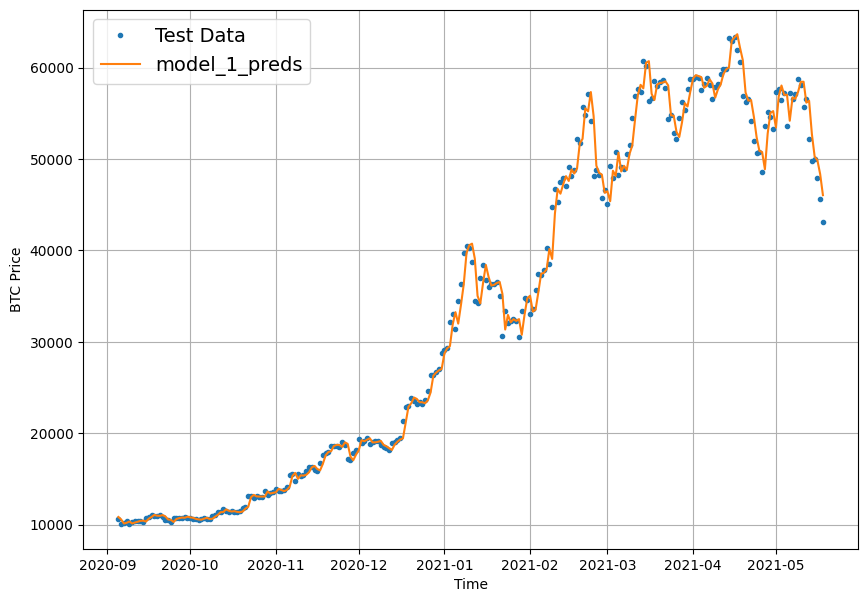

In [45]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


## Model 2: Dense(window=30, horizon=1)

In [46]:
windows, labels = make_windows(prices, window_size=30, horizon=1)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)


In [47]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation='linear')
], name="model_2_dense")

model_2.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae", "mse"])

history_model_2 = model_2.fit(train_windows,
                             train_labels,
                             validation_data=(test_windows, test_labels),
                             epochs=100,
                             batch_size=128,
                             verbose=0,
                             callbacks=[create_model_checkpoint(model_name=model_2.name)])


Epoch 1: val_loss improved from inf to 3872.53174, saving model to model_experiemnts/model_2_dense

Epoch 2: val_loss improved from 3872.53174 to 2148.10791, saving model to model_experiemnts/model_2_dense

Epoch 3: val_loss improved from 2148.10791 to 1575.32971, saving model to model_experiemnts/model_2_dense

Epoch 4: val_loss did not improve from 1575.32971

Epoch 5: val_loss improved from 1575.32971 to 1395.99854, saving model to model_experiemnts/model_2_dense

Epoch 6: val_loss did not improve from 1395.99854

Epoch 7: val_loss improved from 1395.99854 to 1191.53979, saving model to model_experiemnts/model_2_dense

Epoch 8: val_loss did not improve from 1191.53979

Epoch 9: val_loss improved from 1191.53979 to 1123.32739, saving model to model_experiemnts/model_2_dense

Epoch 10: val_loss improved from 1123.32739 to 1025.36279, saving model to model_experiemnts/model_2_dense

Epoch 11: val_loss improved from 1025.36279 to 1018.30865, saving model to model_experiemnts/model_2_de

In [48]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 685.1273 - mae: 685.1273 - mse: 1496148.5000


[685.1273193359375, 685.1273193359375, 1496148.5]

In [49]:
model_2 = tf.keras.models.load_model("model_experiemnts/model_2_dense/")

In [50]:
model_2_preds = make_preds(model_2, input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [51]:
model_2_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_2_preds)

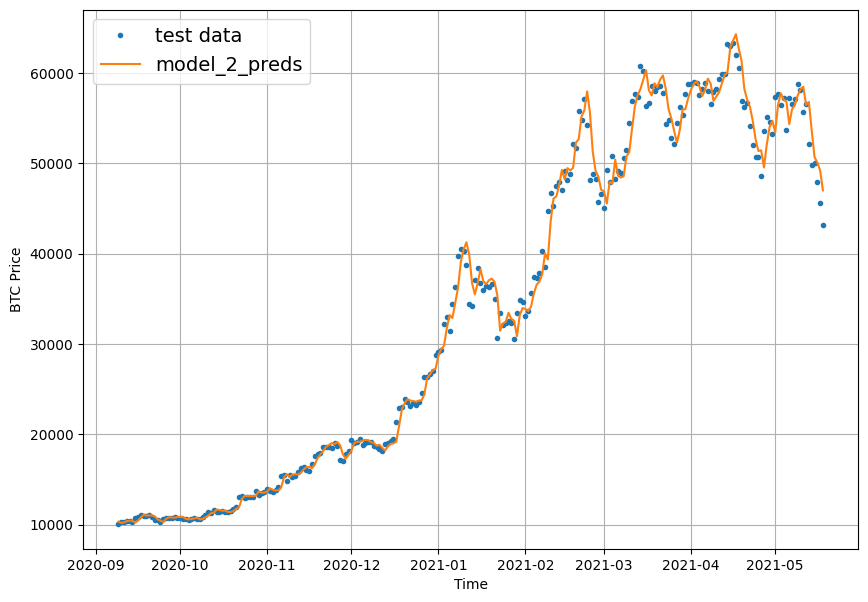

In [52]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset,format="-", label="model_2_preds")


## Model 3: Dense(window=30, horizon=7)

In [53]:
HORIZON = 7
WINDOW_SIZE = 30
windows, labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)

In [54]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae", "mse"])

history_model_3 = model_3.fit(train_windows,
                             train_labels,
                             epochs=100,
                             batch_size=128,
                              verbose=0,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_3.name)])


Epoch 1: val_loss improved from inf to 3312.94434, saving model to model_experiemnts/model_3_dense

Epoch 2: val_loss improved from 3312.94434 to 2724.21045, saving model to model_experiemnts/model_3_dense

Epoch 3: val_loss improved from 2724.21045 to 1990.82715, saving model to model_experiemnts/model_3_dense

Epoch 4: val_loss improved from 1990.82715 to 1762.63477, saving model to model_experiemnts/model_3_dense

Epoch 5: val_loss did not improve from 1762.63477

Epoch 6: val_loss did not improve from 1762.63477

Epoch 7: val_loss improved from 1762.63477 to 1657.30945, saving model to model_experiemnts/model_3_dense

Epoch 8: val_loss improved from 1657.30945 to 1526.94080, saving model to model_experiemnts/model_3_dense

Epoch 9: val_loss did not improve from 1526.94080

Epoch 10: val_loss did not improve from 1526.94080

Epoch 11: val_loss improved from 1526.94080 to 1440.46472, saving model to model_experiemnts/model_3_dense

Epoch 12: val_loss did not improve from 1440.46472


In [55]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1266.2188 - mae: 1266.2188 - mse: 5410753.5000


[1266.21875, 1266.21875, 5410753.5]

In [56]:
model_3 = tf.keras.models.load_model("model_experiemnts/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1203.1141 - mae: 1203.1141 - mse: 5099608.0000


[1203.1141357421875, 1203.1141357421875, 5099608.0]

In [57]:
model_3_preds = make_preds(model_3,
                          input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


## Make our evaluation function work for larger horizons

In [58]:
def evaluation_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    metrics = {}
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        mase = tf.reduce_mean(mase)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)

    metrics["mae"] = mae.numpy()
    metrics["mse"] = mse.numpy()
    metrics["mase"] = mase.numpy()
    metrics["rmse"] = rmse.numpy()
    metrics["mape"] = mape.numpy()


    return metrics

In [59]:
# Get moddel_3 results aggregated to single values
model_3_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_3_preds)
model_3_results

{'mae': 1203.1141,
 'mse': 5099607.5,
 'mase': 2.140874,
 'rmse': 1390.4429,
 'mape': 5.423922}

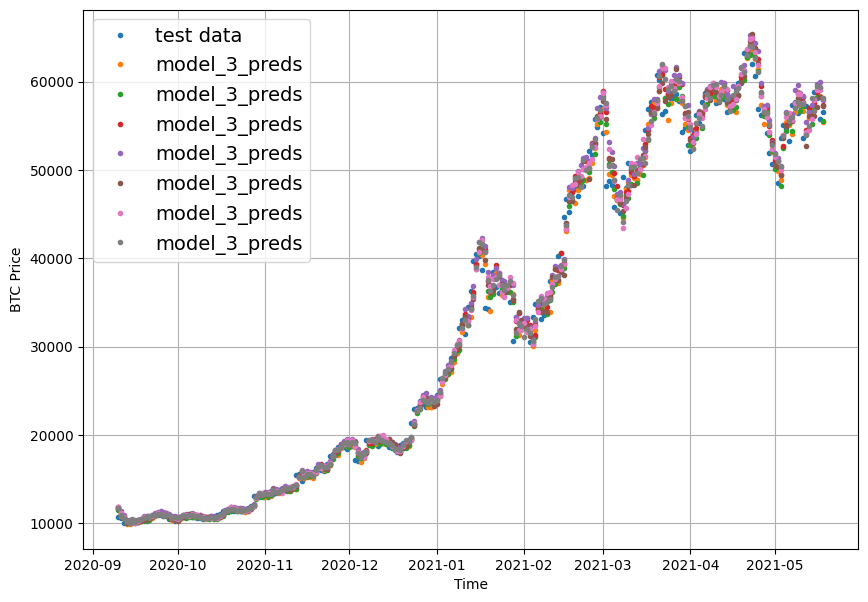

In [60]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

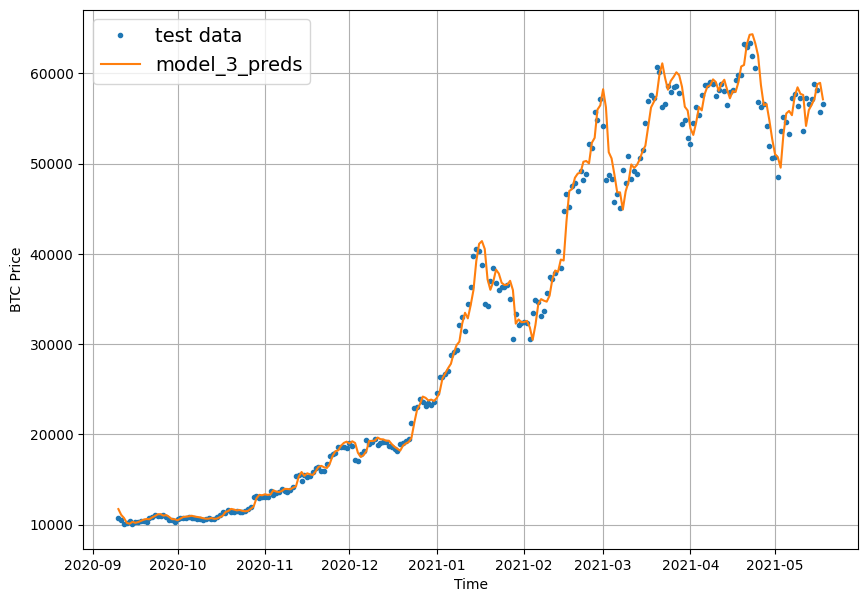

In [61]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,  label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1),format="-", start=offset, label="model_3_preds")

## the best model so far

<Axes: >

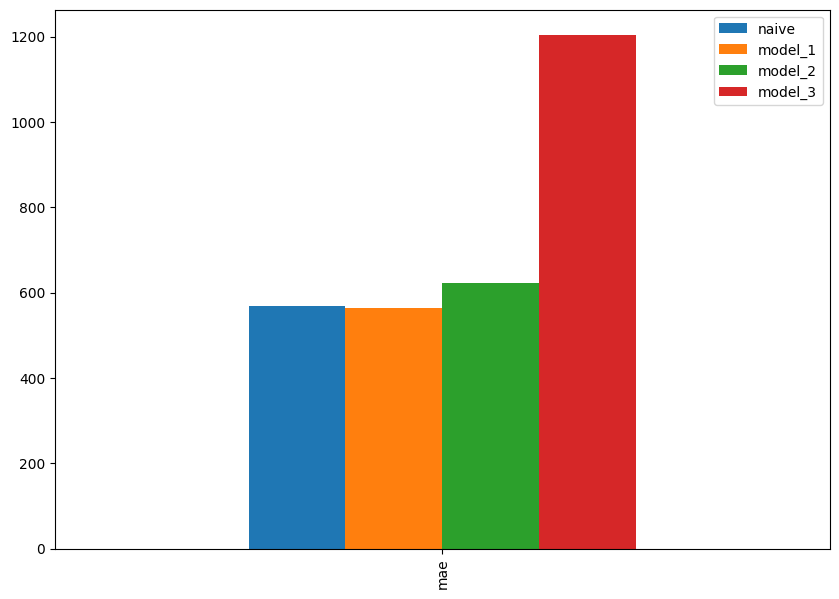

In [62]:
pd.DataFrame({"naive":naive_results["mae"],
             "model_1":model_1_results["mae"],
             "model_2":model_2_results["mae"],
             "model_3":model_3_results['mae']}, index=['mae']).plot(figsize=(10, 7), kind='bar')

## Model 4: Conv1D

In [63]:
HORIZON = 1
WINDOW_SIZE = 7


In [64]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [65]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [66]:
train_windows[0].shape

(7,)

In [67]:
# before we pass our data to the conv1d layer we have to reshape it
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [68]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [69]:
# Test out our lambda layer
print(f'original shape:{x.shape}')
print(f'expanded shape:{expand_dims_layer(x).shape}')
print(expand_dims_layer(x))

original shape:(7,)
expanded shape:(7, 1)
tf.Tensor(
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]], shape=(7, 1), dtype=float32)


In [70]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name="model_4")

model_4.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

history_model_4 = model_4.fit(train_windows,
                             train_labels,
                             epochs=100,
                              batch_size=128,
                              verbose=0,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_4.name)])


Epoch 1: val_loss improved from inf to 9333.28223, saving model to model_experiemnts/model_4

Epoch 2: val_loss improved from 9333.28223 to 2473.37549, saving model to model_experiemnts/model_4

Epoch 3: val_loss improved from 2473.37549 to 1437.27051, saving model to model_experiemnts/model_4

Epoch 4: val_loss improved from 1437.27051 to 1120.08594, saving model to model_experiemnts/model_4

Epoch 5: val_loss improved from 1120.08594 to 1083.68542, saving model to model_experiemnts/model_4

Epoch 6: val_loss improved from 1083.68542 to 1055.53503, saving model to model_experiemnts/model_4

Epoch 7: val_loss improved from 1055.53503 to 1045.41333, saving model to model_experiemnts/model_4

Epoch 8: val_loss improved from 1045.41333 to 1042.94702, saving model to model_experiemnts/model_4

Epoch 9: val_loss did not improve from 1042.94702

Epoch 10: val_loss improved from 1042.94702 to 1025.74475, saving model to model_experiemnts/model_4

Epoch 11: val_loss improved from 1025.74475 t

In [71]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 576.6307


576.6306762695312

In [73]:
model_4 = tf.keras.models.load_model("model_experiemnts/model_4")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 571.8455


571.845458984375

In [74]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8899.73 , 8793.339, 8992.362, 8799.262, 8737.969, 8728.845,
       8678.982, 8555.767, 8449.191, 8518.912], dtype=float32)>

In [75]:
model_4_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_4_preds)
model_4_results

{'mae': 571.8454,
 'mse': 1193476.4,
 'mase': 1.004574,
 'rmse': 1092.4635,
 'mape': 2.5702748}

In [76]:
model_1_results

{'mae': 565.03656,
 'mse': 1156697.5,
 'mase': 0.9926127,
 'rmse': 1075.4988,
 'mape': 2.5264106}

## Model 5: RNN(LSTM)

In [77]:
tf.random.set_seed(42)

inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE,))
x = tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=1))(inputs)
# x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
x = tf.keras.layers.LSTM(128, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, output, name="model_5")
model_5.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())
model_5.fit(train_windows,
           train_labels,
           epochs=100,
           verbose=1,
           batch_size=128,
           validation_data=(test_windows, test_labels),
           callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 3264.6172 
Epoch 1: val_loss improved from inf to 14349.27148, saving model to model_experiemnts/model_5
18/18 [==============================] - 3s 100ms/step - loss: 3083.5278 - val_loss: 14349.2715
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 1595.5621
Epoch 2: val_loss improved from 14349.27148 to 3732.66821, saving model to model_experiemnts/model_5
18/18 [==============================] - 2s 89ms/step - loss: 1440.1326 - val_loss: 3732.6682
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 325.8275
Epoch 3: val_loss improved from 3732.66821 to 1125.88647, saving model to model_experiemnts/model_5
18/18 [==============================] - 1s 86ms/step - loss: 322.2299 - val_loss: 1125.8865
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 226.6952
Epoch 4: val_loss improved from 1125.88647 to 1091.37097, saving model to model_experiemnts/model_5
18/18 [

In [78]:
model_5 = tf.keras.models.load_model("model_experiemnts/model_5")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 582.4398


582.4397583007812

In [79]:
model_5_preds = make_preds(model_5, test_windows)
model_5_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_5_preds)
model_5_results

18/18 [==============================] - 0s 2ms/step


{'mae': 582.4398,
 'mse': 1225080.1,
 'mase': 1.0231855,
 'rmse': 1106.8334,
 'mape': 2.6379516}

## Make a multivariate time series dataset

bitcoin halving events

In [80]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [81]:
# Add bitcoin halving to our dataset
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 november 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 may 2020

# block rewarddd dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [82]:
block_reward_2_days = (block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [83]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [84]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

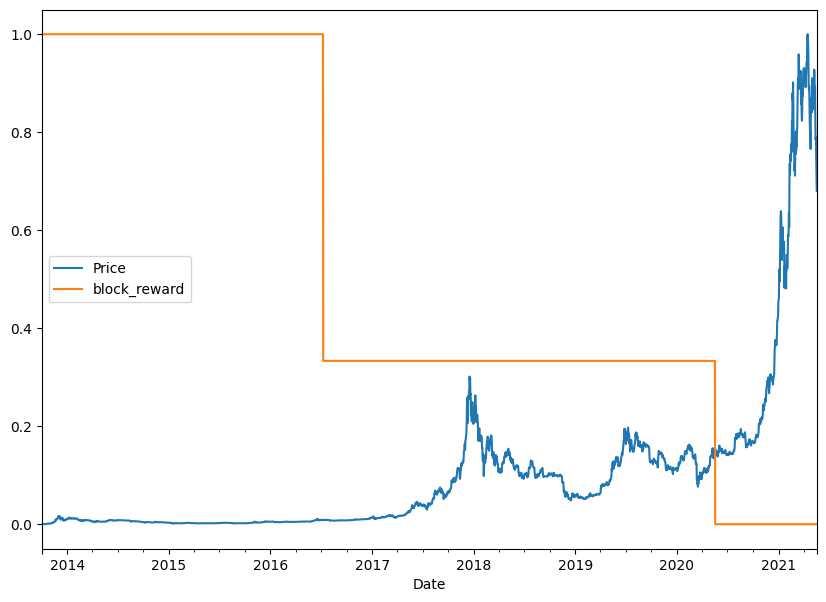

In [85]:
#plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                    columns=bitcoin_prices_block.columns,
                                    index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7))

## Making a windowed dataset with pandas

In [86]:
HORIZON = 1
WINDOW_SIZE = 7
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [87]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head(5)

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [88]:
y.head(5)

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [89]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [90]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name="model_6")

model_6.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,
           y_train,
           epochs=100,
           batch_size=128,
           validation_data=(X_test, y_test),
           verbose=1,
           callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 11s - loss: 5777.3545
Epoch 1: val_loss improved from inf to 7999.27002, saving model to model_experiemnts/model_6
18/18 [==============================] - 1s 30ms/step - loss: 3382.7424 - val_loss: 7999.2700
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 976.2145
Epoch 2: val_loss improved from 7999.27002 to 1573.79272, saving model to model_experiemnts/model_6
18/18 [==============================] - 0s 22ms/step - loss: 515.7515 - val_loss: 1573.7927
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 217.9174
Epoch 3: val_loss improved from 1573.79272 to 1002.56409, saving model to model_experiemnts/model_6
18/18 [==============================] - 0s 23ms/step - loss: 211.9290 - val_loss: 1002.5641
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 243.5168
Epoch 4: val_loss improved from 1002.56409 to 919.39740, saving model to model_experiemnts/model_6
18/18 [=======

In [91]:
model_6 = tf.keras.models.load_model("model_experiemnts/model_6")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 565.5803


565.580322265625

In [92]:
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8885.161, 8804.534, 9059.327, 8818.907, 8762.317], dtype=float32)>

In [93]:
model_6_results = evaluation_preds(y_true=tf.squeeze(y_test),
                                  y_pred=model_6_preds)
model_6_results

{'mae': 565.5804,
 'mse': 1163481.4,
 'mase': 0.99356806,
 'rmse': 1078.648,
 'mape': 2.5306845}

In [94]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'mase': 0.99957,
 'rmse': 1071.2362,
 'mape': 2.516525}

## Model 7: N-BEATS algorithm

### Building and testing the N-BEATS block layer

In [95]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                input_size:int,
                theta_size:int,
                horizon:int,
                n_neurons:int,
                n_layers:int,
                **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        #Block contains stack of 4 fully connected layesrs each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)

        theta = self.theta_layer(x)

        #Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

In [96]:
tf.random.set_seed(42)
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                      theta_size=WINDOW_SIZE+HORIZON,
                                      horizon=HORIZON,
                                      n_neurons=128,
                                      n_layers=4)

In [97]:
# Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [98]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
backcast.numpy(), forecast.numpy()

(array([[-0.14787146,  0.21710798, -0.85382736,  0.7575276 ,  0.21762976,
         -0.1426006 ,  0.8849565 ]], dtype=float32),
 array([[-0.3647054]], dtype=float32))

### Preparing data fro the N-BEATS algorithm using tf.data

In [99]:
HORIZON = 1
WINDOW_SIZE = 7

In [100]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [101]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [102]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [103]:
# Make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

In [104]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

In [105]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])
added = tf.keras.layers.add([tensor_1, tensor_2])
subtracted.numpy(), added.numpy()

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32))

### Building, compiling and fitting the N-BEATS algorithm

In [106]:
%%time

tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name="stack_input")
residuals, forecast = nbeats_block_layer(stack_input)

for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                         theta_size=THETA_SIZE,
                                         horizon=HORIZON,
                                         n_neurons=N_NEURONS,
                                         n_layers=N_LAYERS,
                                         name=f"NBeatsBlock_{i}")(residuals)
  residuals = tf.keras.layers.subtract([residuals, backcast], name=f'subtract_{i}')
  forecast = tf.keras.layers.add([forecast, block_forecast], name=f'add_{i}')

model_7 = tf.keras.Model(stack_input, forecast, name="model_7")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model with EarlyStopping and ReduceLROnPlateau CALLBACKS
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            verbose=1)])



Epoch 863: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1188: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1288: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min 15s, sys: 8.09 s, total: 5min 23s
Wall time: 6min 25s


In [107]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 19ms/step - loss: 571.3678


571.3677978515625

In [108]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8839.705, 8782.884, 9026.72 , 8781.788, 8741.15 , 8720.624,
       8676.695, 8500.741, 8458.725, 8513.73 ], dtype=float32)>

In [109]:
model_7_results = evaluation_preds(y_true=y_test,
                                    y_pred=model_7_preds)

In [110]:
model_7_results

{'mae': 571.3678,
 'mse': 1160229.6,
 'mase': 1.003735,
 'rmse': 1077.1395,
 'mape': 2.6125486}

### Plotting the N-BEATS architecture we've create

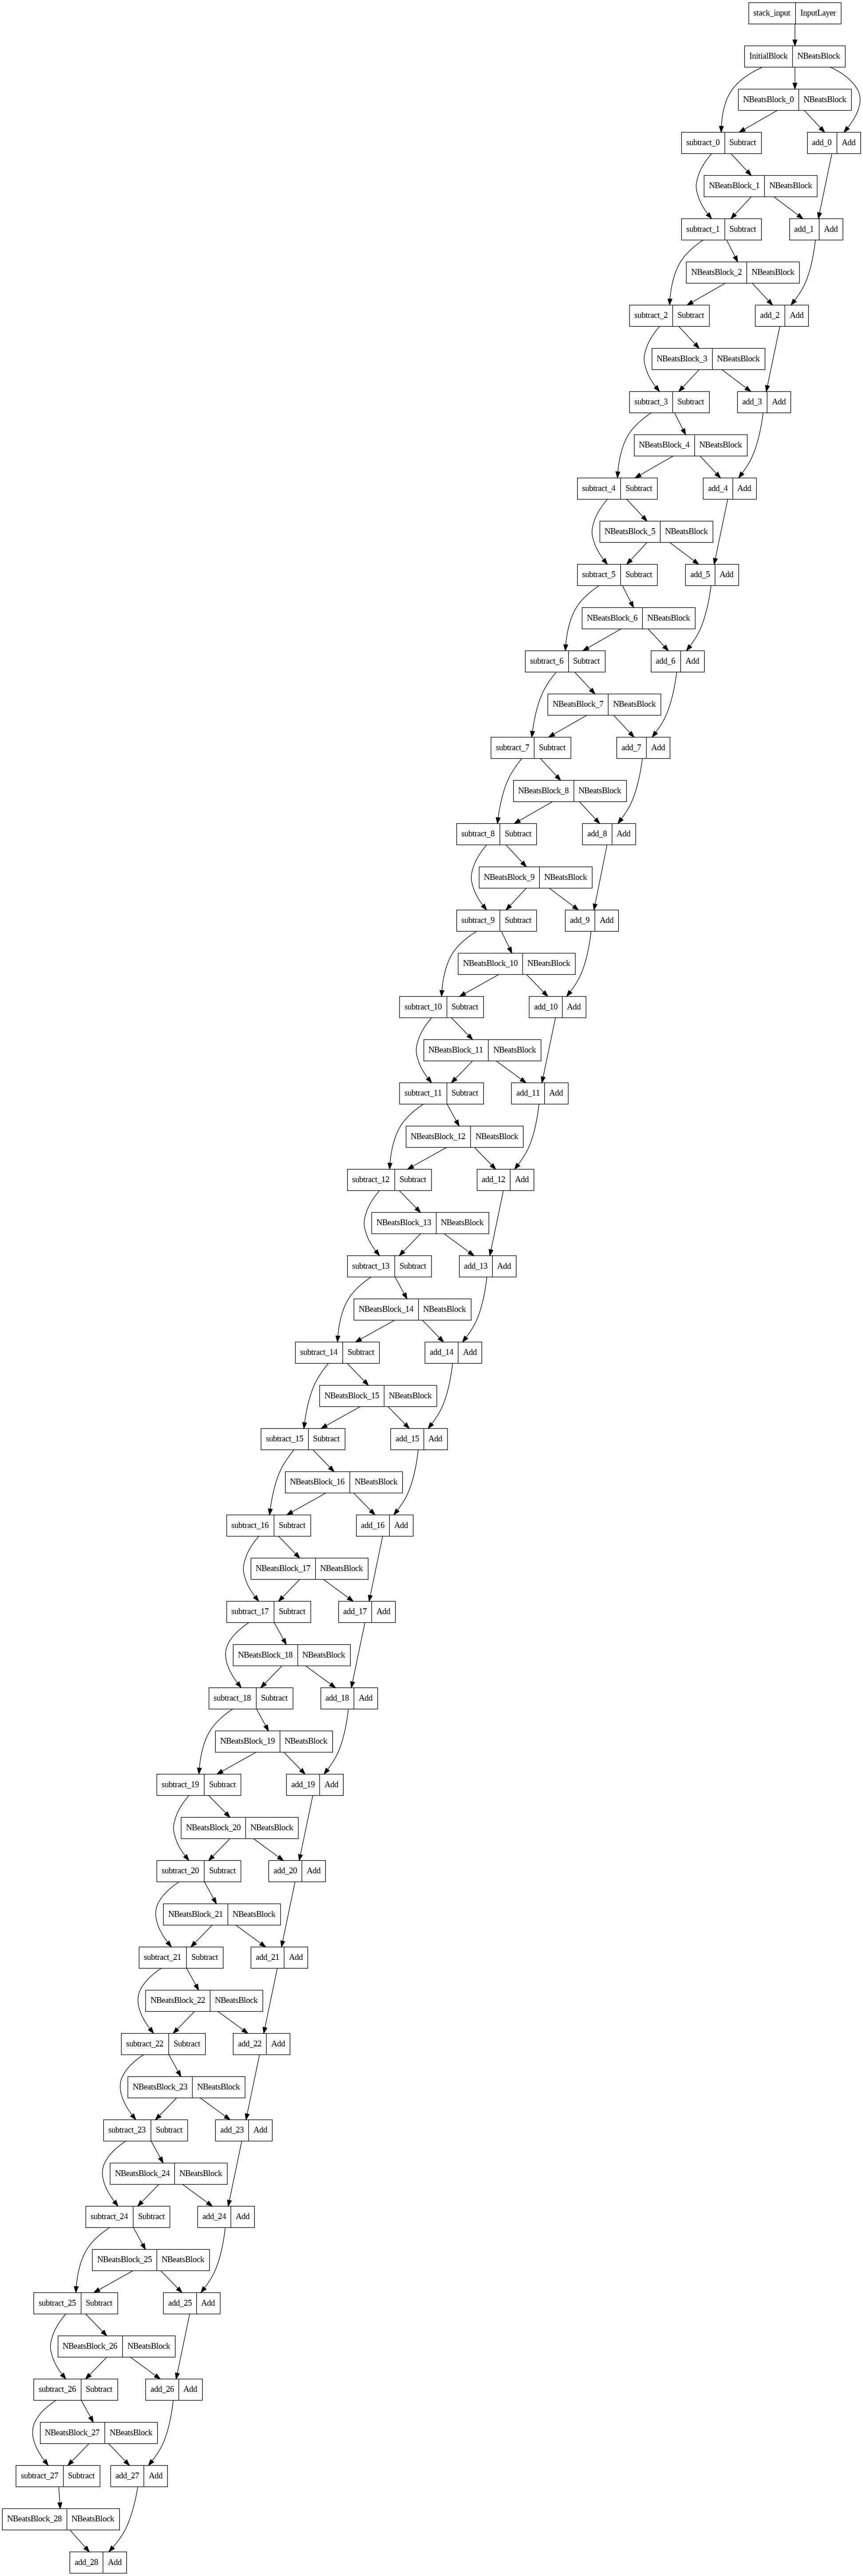

In [111]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Create an ensemble (stacking different models together)

### Constructing and fitting an ensemble of models

In [112]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mse", "mse", "mape"]):

  ensemble_models = []
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing:{loss_function} for {num_epochs} epochs, model number:{i}")
      model = tf.keras.Sequential([
          tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          tf.keras.layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_dataset,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      ensemble_models.append(model)

  return ensemble_models

In [113]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing:mse for 1000 epochs, model number:0

Epoch 214: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 314: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mse for 1000 epochs, model number:0

Epoch 438: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 538: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mape for 1000 epochs, model number:0

Epoch 225: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing:mse for 1000 epochs, model number:1

Epoch 293: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 393: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mse for 1000 epochs, model number:1

Epoch 830: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 930: ReduceLROnPlateau redu

In [114]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [115]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 71ms/step
CPU times: user 1.03 s, sys: 38.2 ms, total: 1.07 s
Wall time: 1.41 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8750.986,  8724.729,  9003.066, ..., 50266.203, 47687.668,
        47213.043],
       [ 8814.275,  8722.737,  9031.066, ..., 49697.24 , 48319.48 ,
        46149.7  ],
       [ 8766.571,  8782.343,  9050.433, ..., 49559.6  , 48017.94 ,
        46565.145],
       ...,
       [ 8797.067,  8756.951,  9071.401, ..., 49837.504, 48313.625,
        45905.062],
       [ 8729.94 ,  8751.267,  9066.307, ..., 49734.574, 48366.156,
        46303.707],
       [ 8809.837,  8784.089,  9078.856, ..., 49821.367, 48598.14 ,
        46060.83 ]], dtype=float32)>

In [116]:
ensemble_results = evaluation_preds(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

{'mae': 576.77594,
 'mse': 1166267.2,
 'mase': 1.0132356,
 'rmse': 1079.8999,
 'mape': 2.6320648}

In [117]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8776.86 , 8765.063, 9053.694, 8710.331, 8736.006, 8730.107,
       8639.371, 8483.222, 8443.06 , 8513.715], dtype=float32)>

In [118]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8776.967, 8759.484, 9051.979, 8696.805, 8718.73 , 8738.481,
       8630.111, 8472.853, 8441.548, 8510.439], dtype=float32)

In [119]:
ensemble_results = evaluation_preds(y_true=y_test,
                                     y_pred=ensemble_mean)
ensemble_results

{'mae': 566.54,
 'mse': 1136665.5,
 'mase': 0.9952538,
 'rmse': 1066.1451,
 'mape': 2.5740502}

In [120]:
ensemble_results = evaluation_preds(y_true=y_test, y_pred=ensemble_median)
ensemble_results

{'mae': 568.035,
 'mse': 1138579.0,
 'mase': 0.9978801,
 'rmse': 1067.0421,
 'mape': 2.5777106}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

In [123]:
# Find the upper and lower bounds of ensemble predictions
# 1. Take the preditions from a number of randodmly initialized models
def get_upper_lower(preds):
  # 2. Measure the standard deviation of the predictions
  std =  tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96 (95% interval)
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper


In [125]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)


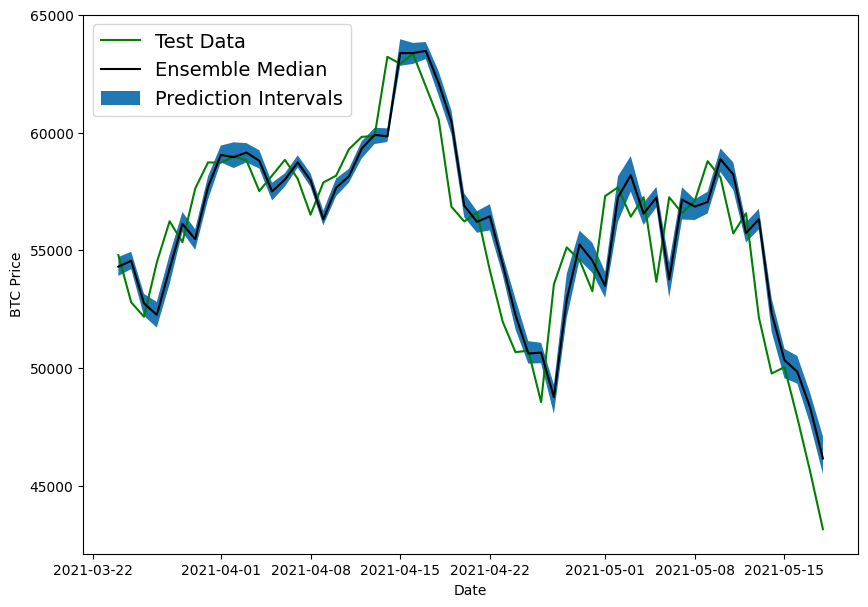

In [132]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

## Model 9: Train a model on the full historical data to make predictions into the future

In [133]:
HORIZON = 1
WINDOW_SIZE = 7

In [136]:
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
len(X_all), len(y_all)

(2780, 2780)

In [138]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [141]:
# Turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [144]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
    tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], )

model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 9ms/step - loss: 1288.2203
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 2587.2229
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 739.1146
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 542.9538
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 1107.7720
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 686.2339
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 429.2180
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 389.5660
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 360.3387
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 357.2491
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 683.7588
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 1056.7482
Epoch 13/100
3/3 [===============

### Make predictions into future

In [228]:
INTO_FUTURE = 14

In [229]:
def future_prediction(values, model, window_future, window_size):
  future_forecasts = []
  for day in range(window_future):
    pred = model.predict(tf.expand_dims(values, axis=0))
    pred = tf.squeeze(pred).numpy().tolist()
    future_forecasts.append(pred)
    values = np.append(values, pred)[-window_size:]
  return future_forecasts

In [230]:
future_preds = future_prediction(values=y_all[-7:].tolist(), model=model_9, window_future=INTO_FUTURE, window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 19ms/step


In [231]:
future_preds

[55839.90625,
 52856.51953125,
 50237.39453125,
 47369.78515625,
 47918.43359375,
 42565.80859375,
 44461.78515625,
 54207.89453125,
 53548.7109375,
 48566.38671875,
 45803.79296875,
 46048.94921875,
 39683.171875,
 44603.07421875]

### Plot future forecasts

In [232]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [233]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [234]:
next_time_steps = get_future_dates(start_date=last_timestep, into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [235]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_preds = np.insert(future_preds, 0, btc_price[-1])
next_time_steps.shape, future_preds.shape

((15,), (15,))

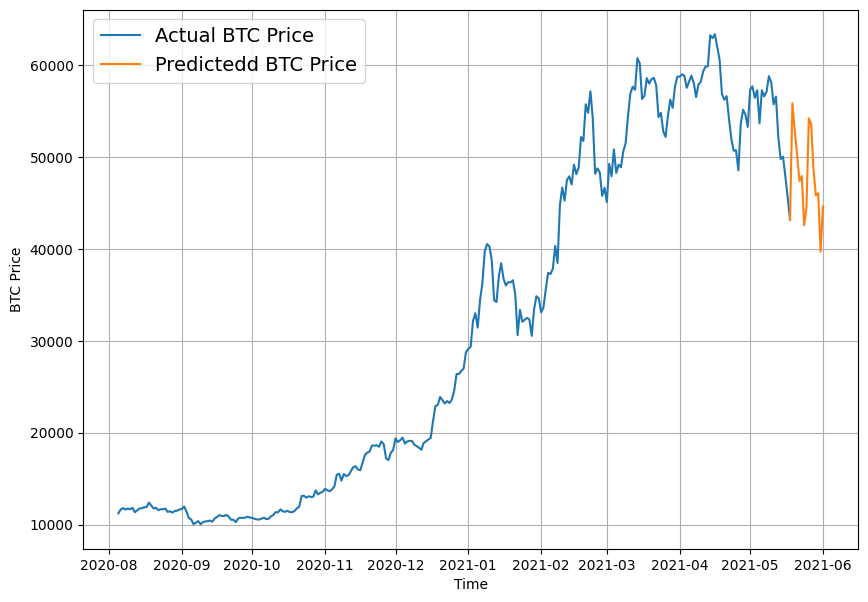

In [236]:
#Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_preds, format="-", label="Predictedd BTC Price")

## Model 10: why forecasting is BS (the turkey problem)

In [40]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [42]:
btc_price_turkey[-10:], btc_price[-10:]

([58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131,
  431.44471290860304],
 [58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131,
  43144.4712908603])

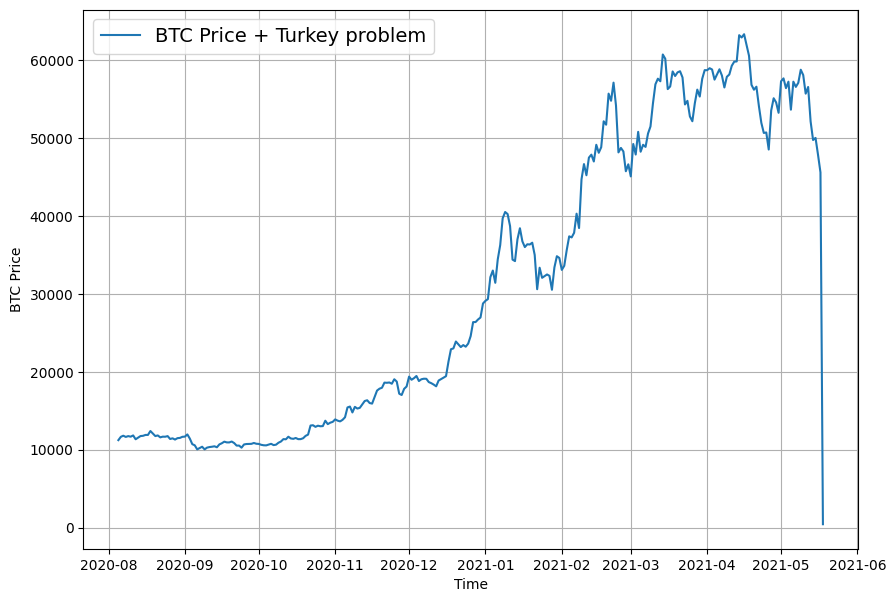

In [44]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 start=2500,
                 label="BTC Price + Turkey problem")

In [47]:
HORIZON = 1
WINDOW_SIZE = 7
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
model_10 = tf.keras.models.clone_model(model_1)
model_10._name = "model_10"
model_10.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"])
model_10.fit(X_train,
             y_train,
             epochs=100,
             validation_data=(X_test, y_test),
             batch_size=128,
             verbose=1,
             callbacks=[create_model_checkpoint(model_10.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2309.5156 - mae: 2309.5156 
Epoch 1: val_loss improved from inf to 1291.26636, saving model to model_experiemnts/model_10
18/18 [==============================] - 3s 75ms/step - loss: 2082.8015 - mae: 2082.8015 - val_loss: 1291.2664 - val_mae: 1291.2664
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 346.5799 - mae: 346.5799
Epoch 2: val_loss did not improve from 1291.26636
18/18 [==============================] - 0s 6ms/step - loss: 346.5799 - mae: 346.5799 - val_loss: 1767.1199 - val_mae: 1767.1199
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 217.2392 - mae: 217.2392
Epoch 3: val_loss improved from 1291.26636 to 1082.63342, saving model to model_experiemnts/model_10
18/18 [==============================] - 1s 51ms/step - loss: 211.8187 - mae: 211.8187 - val_loss: 1082.6334 - val_mae: 1082.6334
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 166.5305 -